<a href="https://colab.research.google.com/github/salvapineda/notebooks/blob/main/ChronologicalClustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chronological time-period clustering in Python

This notebook presents the chronological time-period clustering proposed in the paper below:

S. Pineda and J. M. Morales, "Chronological Time-Period Clustering for Optimal Capacity Expansion Planning With Storage," in IEEE Transactions on Power Systems, vol. 33, no. 6, pp. 7162-7170, Nov. 2018. ([link](https://ieeexplore.ieee.org/document/8369128))

## Requirements

In [47]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.sparse import diags
from sklearn.cluster import AgglomerativeClustering

## Input data

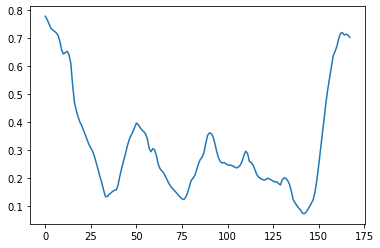

In [48]:
data = np.array([0.779193, 0.767765, 0.752112, 0.737155, 0.730268, 0.725416, 0.72001, 0.711246, 0.689414, 0.657575, 0.644012, 0.649598, 0.654228, 0.642317, 0.609851, 0.533485, 0.471323, 0.442242, 0.419492, 0.400973, 0.388427, 0.371992, 0.354692, 0.336774, 0.32012, 0.308062, 0.29632, 0.277281, 0.254904, 0.231111, 0.206058, 0.183622, 0.157969, 0.134542, 0.134931, 0.141976, 0.147907, 0.153628, 0.156941, 0.159323, 0.178966, 0.210753, 0.238278, 0.263149, 0.288171, 0.31535, 0.337719, 0.352767, 0.366171, 0.381785, 0.397243, 0.392435, 0.381742, 0.373076, 0.36719, 0.358884, 0.34117, 0.306336, 0.295166, 0.306054, 0.30194, 0.280319, 0.24955, 0.23402, 0.226327, 0.218799, 0.205479, 0.192051, 0.179503, 0.169562, 0.161625, 0.155322, 0.147802, 0.139383, 0.133413, 0.126592, 0.124298, 0.131504, 0.146907, 0.169325, 0.19213, 0.199742, 0.210056, 0.229697, 0.250714, 0.266903, 0.275074, 0.290311, 0.322935, 0.352705, 0.362177, 0.360638, 0.348965, 0.326044, 0.297164, 0.27374, 0.260052, 0.254782, 0.256522, 0.252787, 0.248374, 0.247517, 0.246339, 0.24426, 0.239797, 0.237133, 0.240808, 0.247159, 0.261202, 0.282337, 0.2969, 0.288465, 0.260204, 0.256991, 0.247084, 0.231897, 0.213907, 0.205222, 0.1997, 0.196026, 0.194018, 0.19524, 0.200693, 0.197544, 0.193753, 0.190245, 0.187327, 0.187472, 0.180999, 0.176266, 0.194786, 0.201865, 0.199775, 0.19167, 0.178364, 0.154537, 0.123403, 0.112603, 0.103099, 0.094008, 0.087092, 0.076403, 0.072856, 0.078565, 0.088145, 0.099515, 0.111035, 0.123978, 0.151645, 0.194713, 0.245881, 0.302439, 0.359529, 0.413146, 0.470569, 0.51847, 0.559401, 0.599093, 0.638654, 0.653897, 0.671962, 0.699568, 0.717873, 0.720892, 0.71238, 0.71466, 0.71277, 0.704146])
n_data = len(data)
plt.plot(data)
plt.show()

## Chronological clustering

In [49]:
n_clus = 24
conec = diags([np.ones(n_data-1),np.ones(n_data-1)], [-1, 1])
model = AgglomerativeClustering(linkage='ward',connectivity=conec,n_clusters=n_clus, compute_full_tree=False)  
model.fit(data.reshape(-1,1))
res = np.unique(model.labels_,return_index=True,return_counts=True)
average = []
for c in range(n_clus):
  average.append(np.mean(data[model.labels_==c]))
output = []
for l in model.labels_:
  output.append(average[l])

## Solution Output

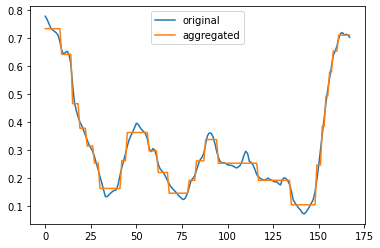

In [50]:
plt.plot(data,label='original')
plt.plot(output,label='aggregated')
plt.legend()
plt.show()